## Observations and Insights

## Dependencies and starter code

In [18]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)
combined_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

<IPython.core.display.Javascript object>


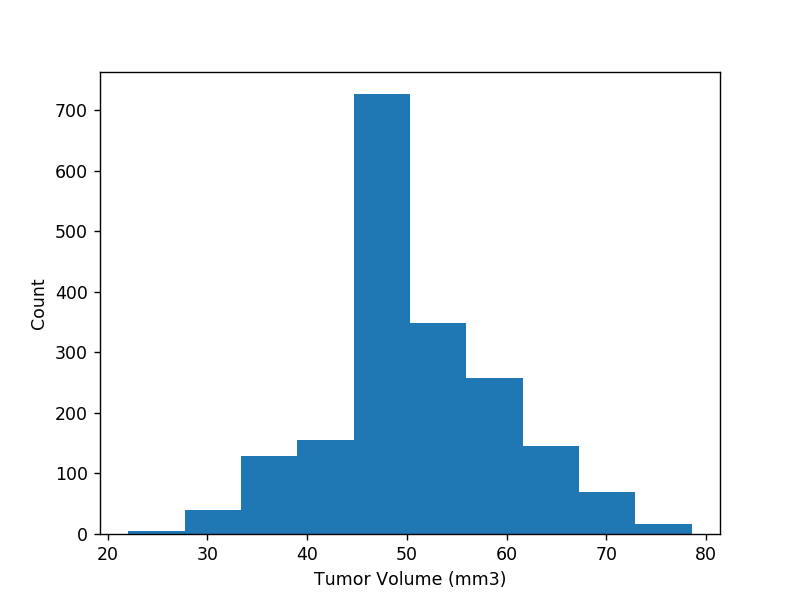

NormaltestResult(statistic=2.4173789830174925, pvalue=0.2985883256753953)


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
plt.hist(combined_df['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Count')
plt.show()
print(st.normaltest(combined_df['Tumor Volume (mm3)'].sample(100)))

## Bar plots

In [22]:
# Create a group based on the values in the 'maker' column
regimen_group = combined_df.groupby('Drug Regimen')

# Count how many times each maker appears in our group
regimens = regimen_group['Drug Regimen'].count()

regimens

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [23]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Create a bar chart based off of the group series from before
count_chart = regimen_group.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Cars")


plt.show()
plt.tight_layout()

## Pie plots

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = combined_df["Sex"].value_counts()
gender_table = combined_df.groupby("Sex")
gender_count.plot.pie
gender_count

Male      958
Female    935
Name: Sex, dtype: int64

In [25]:
# Creates the pie chart based upon the values above


In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, outliers and boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = combined_df['Drug Regimen'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower Drug Regimen is: {lowerq}")
print(f"The upper quartile of Drug Regimen is: {upperq}")
print(f"The interquartile range of Drug Regimen is: {iqr}")
print(f"The the median of Drug Regimen is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier = combined_df.loc[(combined_df['Drug Regimen'] < lower_bound) | (combined_df['Drug Regimen'] > upper_bound)]
outlier

TypeError: can't multiply sequence by non-int of type 'float'

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [ ]:
# drug_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
